In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [ ]:
#Load the data
loan = pd.read_csv("C:/Pravin/Upgrad/cs/loan.csv" , low_memory=False)
loan.shape

In [ ]:
##removing white_spaces from the column names
loan = loan.rename(columns= lambda x: x.strip(), inplace=False)

In [ ]:
loan.describe()

In [ ]:
#Total records present at start
total_count = loan.shape[0]
print("Initial count of records",total_count)

In [ ]:
#Remove all null value column.
loan.dropna(how='all', axis=1, inplace=True)
loan.shape#Remove all null value column.


In [ ]:
loan.head()

In [ ]:
#Determine the percentage of missing values in columns
percent_missing = loan.isnull().sum() * 100 / len(loan)
round(percent_missing.sort_values(ascending=False),0).head(20)

In [ ]:
#remove the columns with more than 60% missing values
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan.shape

In [ ]:
#remove the column with same value in rows
drop_cols = [col for col
             in list(loan)
             if loan[col].nunique() <= 1]
loan = loan.drop(columns=drop_cols)

In [ ]:
loan.shape

In [ ]:
#Dropping columns
#1. Dropping member_id since it is an internal id maintained by system
#2. Dropping the Url, description and zipcode columns since they are not playing role in the classification
loan.drop(['member_id','url','zip_code','desc'],axis = 1,inplace = True)
loan.shape

In [ ]:
##Remove duplicate rows
loan = loan.drop_duplicates()
loan.shape


In [ ]:
##dropping additional columns as they are not required to resolve the problem statement. rather they are of the current status of the running loans
drop_list = ['delinq_2yrs','inq_last_6mths','open_acc','revol_bal','revol_util',\
             'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',\
             'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',\
             'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan.drop(drop_list, axis = 1,inplace = True)
loan.shape


In [ ]:
#Checking % of NaNs in columns (>0)
valuesMissingPercentageInColumn = round(100*loan.isnull().sum()/len(loan.index),4)
valuesMissingPercentageInColumn[valuesMissingPercentageInColumn!=0]


In [ ]:
#Drop null value rows in Title column since the percentage of NaNns in this column is very less (0.0277)
loan = loan[~(loan.title.isnull())]
valuesMissingPercentageInColumn = round(100*loan.isnull().sum()/len(loan.index),4)
valuesMissingPercentageInColumn[valuesMissingPercentageInColumn!=0]

In [ ]:
##Get the Percentage of unique values in 'pub_rec_bankruptcies' column
loan.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True).mul(100).round(3)

In [ ]:
##Imputing NaNs in 'pub_rec_bankruptcies' column with '0' and converting the dtype to 'int'
loan.pub_rec_bankruptcies.fillna('0',inplace=True)
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype('int')

In [ ]:
##Recheck 'pub_rec_bankruptcies' column unique values and dtype
print(loan.pub_rec_bankruptcies.unique())
print(loan.pub_rec_bankruptcies.dtype)

In [ ]:
#again checking percentage of NaNs in columns (>0)
valuesMissingPercentageInColumn = round(100*loan.isnull().sum()/len(loan.index),2)
valuesMissingPercentageInColumn[valuesMissingPercentageInColumn!=0]

In [ ]:
loan

In [ ]:
#Replacing null values in 'emp_title' column with 'undisclosed'
loan.emp_title.fillna('Not Set',inplace=True)

In [ ]:
#Replacing null values in emp_length with 'undisclosed' and since the possible values of years are from 0 to 10, making changes.
loan.emp_length.fillna("Not Set",inplace = True)
loan['emp_length'] = loan['emp_length'].replace({"< 1 year":'0','10+ years':'10'})
loan['emp_length'] = loan['emp_length'].str.strip().str.strip(' years')
loan.emp_length.unique()

In [ ]:
##Convert the datatype of amount columns to float type
amountCols = ['loan_amnt','funded_amnt']
loan[amountCols] = loan[amountCols].astype(float)

In [ ]:
loan.dtypes

In [ ]:
loan

In [ ]:
## converting the date columns (issue_d and earliest_cr_line) to datetime datatype

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [ ]:
#adding new columns MonthOfIssue and YearOfIssue by extracting the month and year of issue_d resp
loan['MonthOfIssue'] = loan.issue_d.dt.month
loan['YearOfIssue'] = loan.issue_d.dt.year

In [ ]:
#similarly add new columns MonthOfCr and YearOfCrLint by extracting the month and year of earliest_cr_line column
loan['MonthOfCr'] = loan.earliest_cr_line.dt.month
loan['YearOfCrLint'] = loan.earliest_cr_line.dt.year
#loan['earliest_cr_line_year'].sort_values(ascending=True).unique()

In [ ]:
#Identify the year derived from teh earliest_cr_line column is relevant
loan['YearOfCrLint'].sort_values(ascending=True).unique()

In [ ]:
#it is seen that there are year values (above 2008) which are of future which is not possible hence we need to substitute a proper value to those furute year values
#hence considering them as error we can reduce them by 100
loan.loc[loan['YearOfCrLint'] > 2008 , 'YearOfCrLint']  = loan[loan['YearOfCrLint'] > 2008]['YearOfCrLint']-100

In [ ]:
loan['YearOfCrLint'].sort_values(ascending=True).unique()

In [ ]:
# treat the int_rate column as to remove teh percentage symbol and keeping it as float
loan['int_rate'] = loan['int_rate'].str.strip().str.strip('%').astype('float')
loan['int_rate'].dtypes

In [ ]:
loan.int_rate.head()

In [ ]:
#converting the term column to integer value by removing the month work
loan.term = loan.term.str.strip().str.strip(' months').astype('int')

In [ ]:
##find the loan status percentage count for the categories Fully Paid ,Charged off and Current
loan.loan_status.value_counts(normalize=True).mul(100).round(2)

In [ ]:
#remnove the records whose loan status is Current as they are no the players in determining the defaulters Vs non-defaulters
loan = loan[~(loan["loan_status"]=='Current')]

##Set values for 'loan_status' variable's unqiue entires. Assign '0' to 'fully paid' and set 'charged off' to '1' (as our target is determine 'defaulter' factors)
loan["loan_status"] = loan["loan_status"].replace('Fully Paid','0')
loan["loan_status"] = loan["loan_status"].replace('Charged Off','1') #Set Target Variable
loan.head()

In [ ]:
loan

In [ ]:
#Check for assigned '0' to 'fully paid' and set 'charged off' to '1' (as our target is to determine 'defaulter' factors)
loan.loan_status.unique()

In [ ]:
#Check 'loan_status' for value counts
loan.loan_status.value_counts()

In [ ]:
#determine the continious and the categorical variables
#below columns are considered as continious variables
col_continious = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']
#put the other variables as categorical variables
col_catagorical = pd.DataFrame(loan.columns)
col_catagorical = col_catagorical[~(col_catagorical[0].isin(col_continious))]


In [ ]:
col_continious

In [ ]:
col_catagorical

# Univariate Analysis and Segmented Univariate Analysis

# Loan Status Analysis:

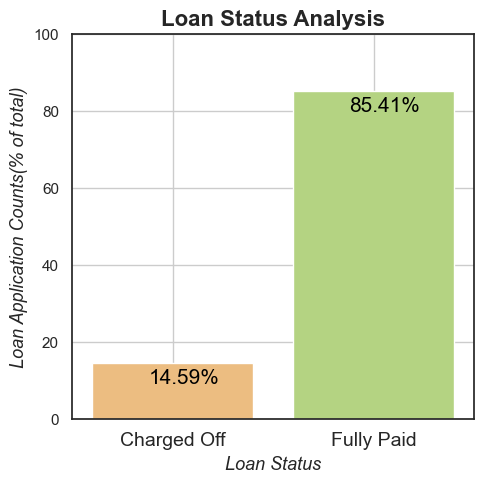

In [170]:
##Lets check how 'loan_status'(%) is distributed
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan.loan_status.value_counts(normalize=True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'loan_status':'loan_status_count'})
ax = sns.barplot(x='index',y='loan_status_count', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=['Charged Off','Fully Paid',], rotation='horizontal', fontsize=14)
plt.xlabel('Loan Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Loan Status Analysis', fontsize=16, fontweight='bold')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()-5.5, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='black',\
            rotation=0)
    
plt.grid(True)
plt.tight_layout()
plt.show()



# Loan Issue Year Analysis:

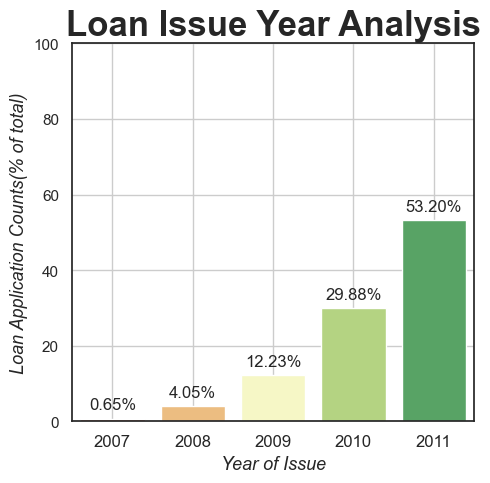

In [171]:
##Lets check the total number of approved applications by year

sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan.YearOfIssue.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'YearOfIssue':'issue_d_year_count'})
ax = sns.barplot(x='index',y='issue_d_year_count', data=br, palette='RdYlGn')

plt.xlabel('Year of Issue', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Issue Year Analysis', fontsize=25, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylim(0,100)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
most of the loans have been given in 2021. This is almost 10 times the loan given year 2008

# Loan Purpose Analysis:

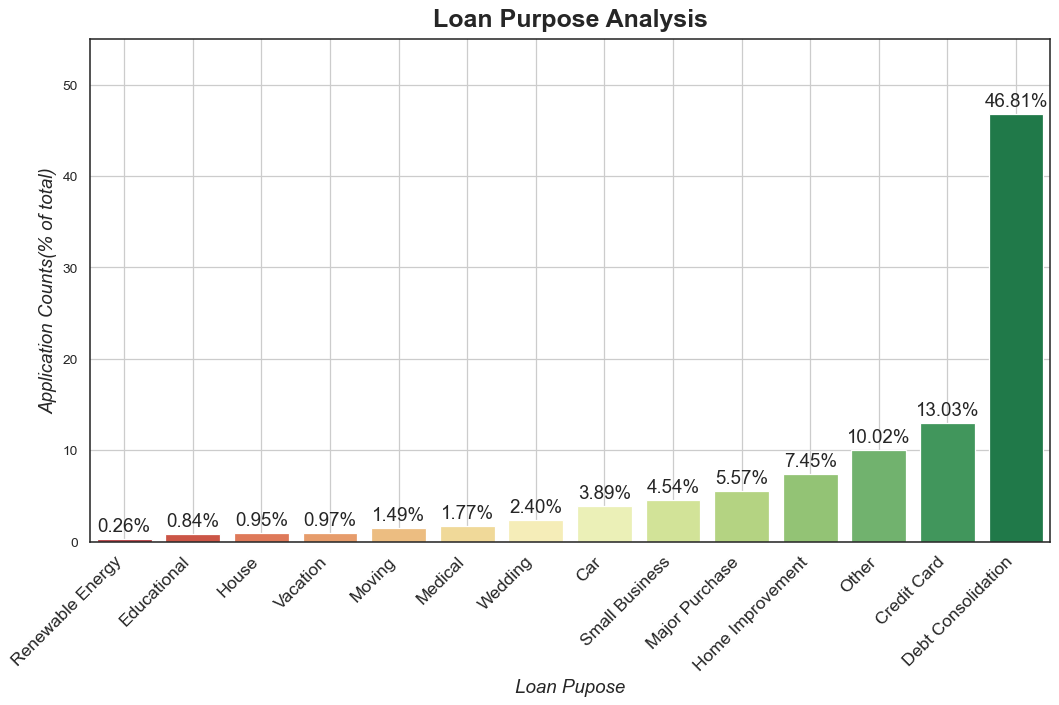

In [175]:
##Loan Purpose analysis
sns.set(style='white')
plt.figure(figsize=(12, 8),dpi = 90)
br = pd.DataFrame(loan.purpose.value_counts(normalize = True).mul(100).sort_values())

br.reset_index(inplace=True)
br = br.rename(columns =  {'index':'Loan_Purpose'} )

ax = sns.barplot(x='Loan_Purpose',y='purpose', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.Loan_Purpose), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Loan Pupose', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Loan Purpose Analysis', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,55)
   
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 15, textcoords = 'offset points' )

plt.xticks(range(0,14),['Renewable Energy','Educational','House','Vacation','Moving','Medical','Wedding','Car',\
                       'Small Business','Major Purchase','Home Improvement','Other','Credit Card','Debt Consolidation'])    
plt.grid(True)
plt.tight_layout()
plt.show()

# 'Applicant's Loan amount' analysis:

C:\Users\pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


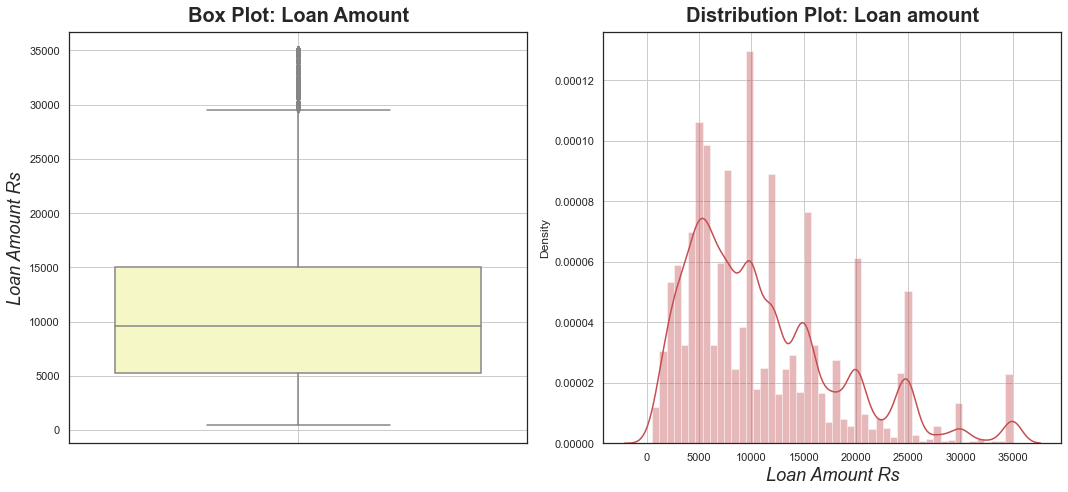

In [176]:
#'Applicant's Loan amount' analysis.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)

sns.boxplot(y = loan.loan_amnt , palette='RdYlGn')
plt.title('Box Plot: Loan Amount', fontsize= 20, fontweight='bold', pad=10)
plt.ylabel('Loan Amount Rs', fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan.loan_amnt , hist= True,color="r" )
plt.title('Distribution Plot: Loan amount', fontsize= 20, fontweight='bold', pad=10)
plt.xlabel('Loan Amount Rs', fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

# Applicant's Annual Income Analysis:

In [ ]:
#Analyzing the applicant's annual income variable
round(loan.annual_inc.describe(percentiles=[0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99]))

C:\Users\pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


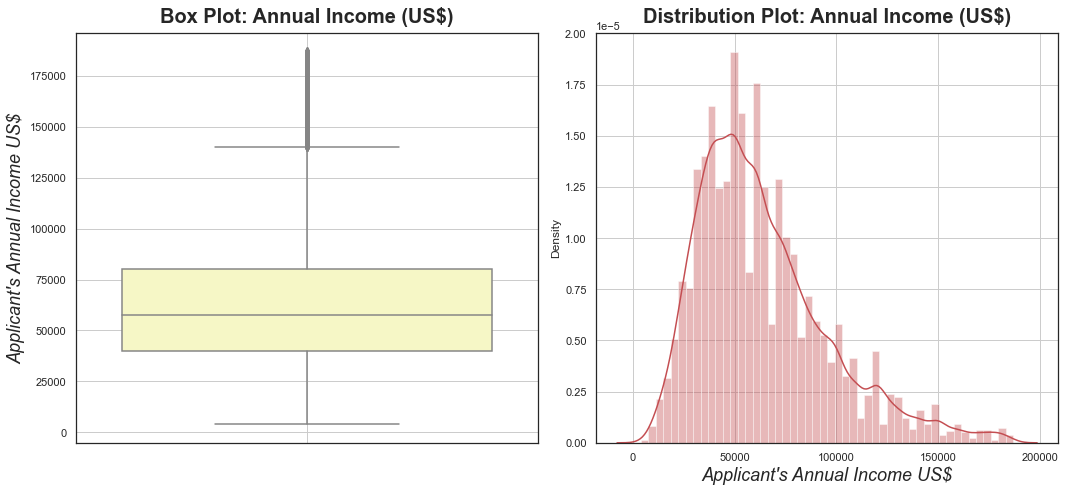

In [177]:
#Eliminating the outliers for analysis, and only considering the data below 98th percentile.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)
sns.boxplot(y = loan[loan.annual_inc <= 187000 ]['annual_inc'],palette='RdYlGn')
plt.title("Box Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.ylabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan[loan.annual_inc <= 187000 ]['annual_inc'] , hist= True ,color="r")
plt.title("Distribution Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
round(loan.annual_inc.describe())

# Bivariate Analysis

# Correlation Matrix

C:\Users\pravin\AppData\Local\Temp/ipykernel_20600/1485631767.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_matrix1, dtype=np.bool))


<Figure size 6000x6000 with 0 Axes>

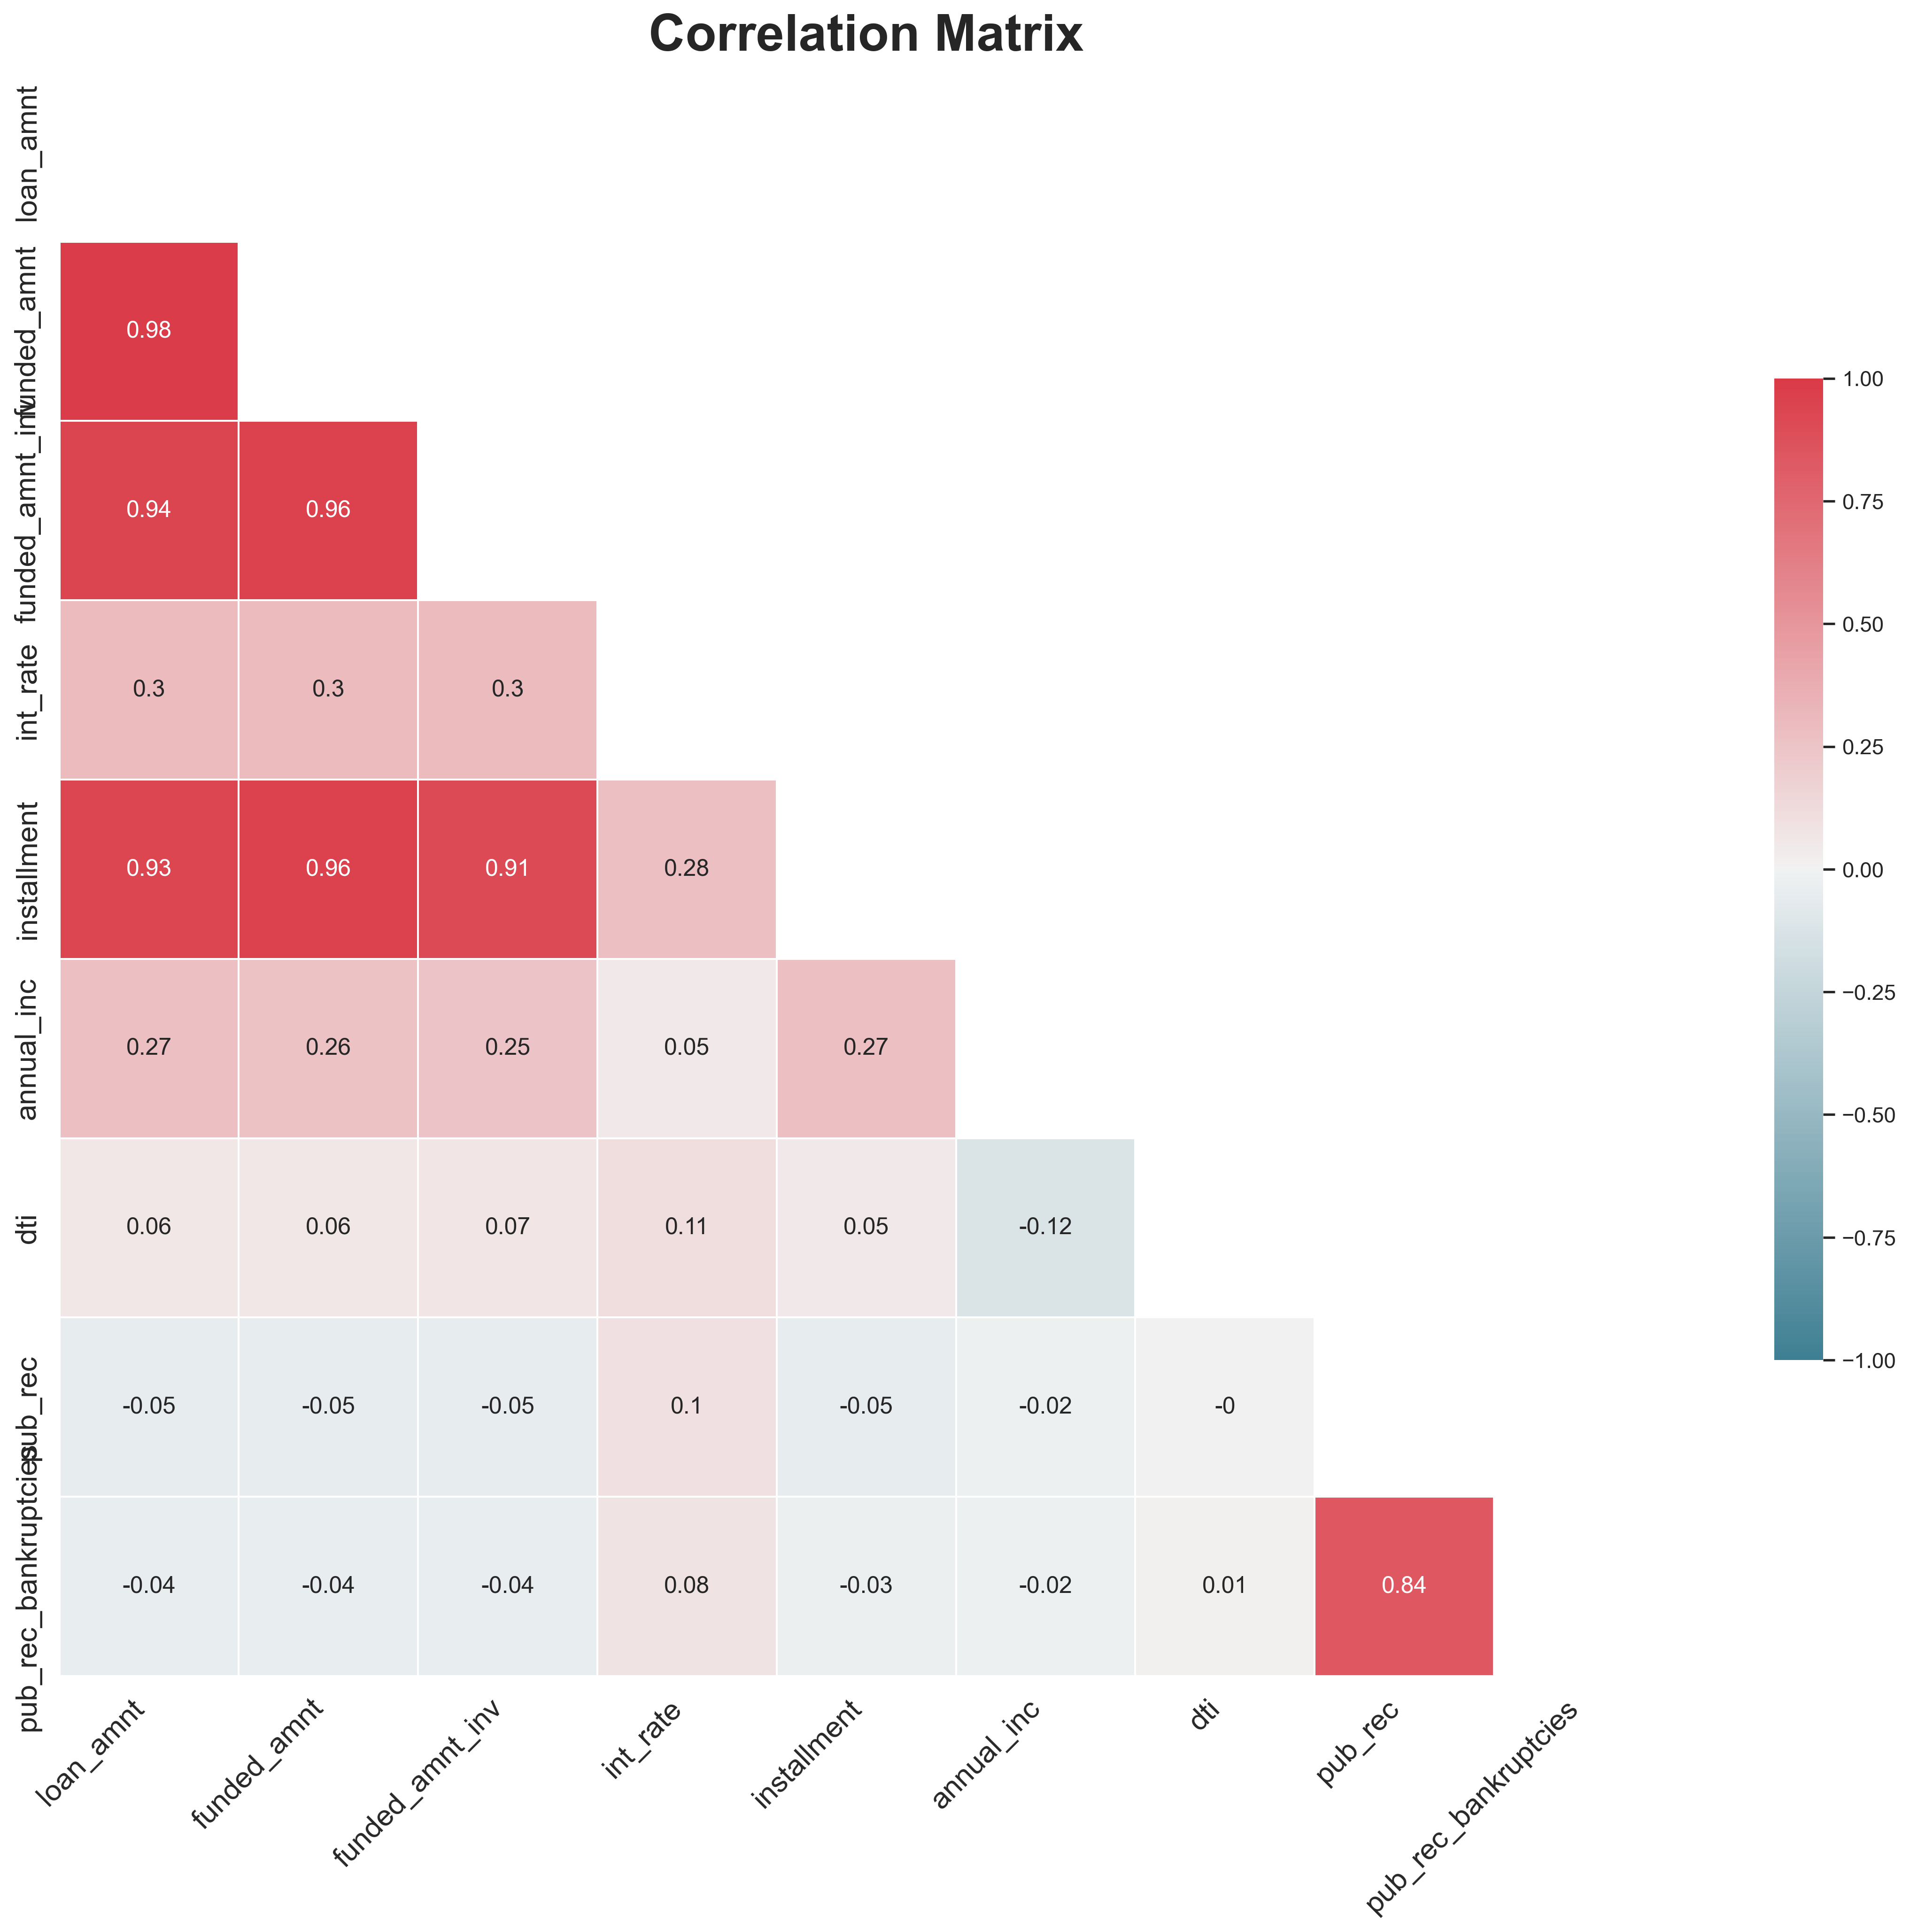

In [178]:
##Bivariate Analyis - Understanding the correlation of continuous variables
sns.set(style='white')
plt.figure (figsize=(20,20), dpi=300)
df_corr_plot1= loan.copy()
#Recall 'col_list_cont: list of columns containing continuous variables'
df_corr_plot1 = df_corr_plot1.loc[:,col_continious]
correlation_matrix1 = round(df_corr_plot1.corr(),2)
correlation_matrix1
mask = np.triu(np.ones_like(correlation_matrix1, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15), dpi=300)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(correlation_matrix1, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix', fontsize=26, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.autoscale()
plt.tight_layout()
plt.show()

# Loan Term by Loan Status Analysis: Overall Percentage

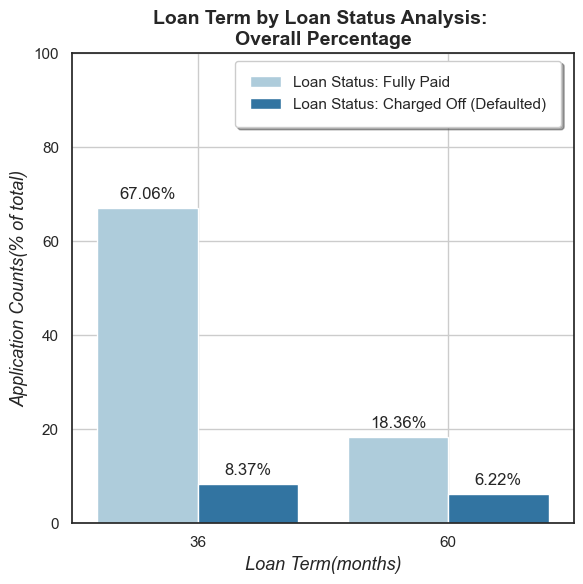

In [179]:
#Analysing applicant's loan term variable 'term' as per 'loan_status'
plt.figure(figsize=(6,6),dpi = 100)
br = pd.DataFrame(100*loan.groupby(['term','loan_status'])['id'].count()/len(loan))
br.reset_index(inplace=True)
br=br.rename(columns={'id':'Percentage'})

ax_123 = sns.barplot(x='term',y='Percentage', hue = 'loan_status',data=br, palette=("Paired"))

plt.xlabel('Loan Term(months)', fontsize= 13, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Term by Loan Status Analysis: \nOverall Percentage', fontsize=14,fontweight='bold')
plt.ylim(0,100)

for p in ax_123.patches:
    ax_123.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#Legend
T1= ax_123.legend(loc='upper center', bbox_to_anchor=(0.65, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T1.get_texts()[0].set_text('Loan Status: Fully Paid')
T1.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.grid(True)
plt.tight_layout()
plt.show()    

Most of the defaulters belong to the 36 month loan term

# Relationship: Average Interest Rate vs Grade

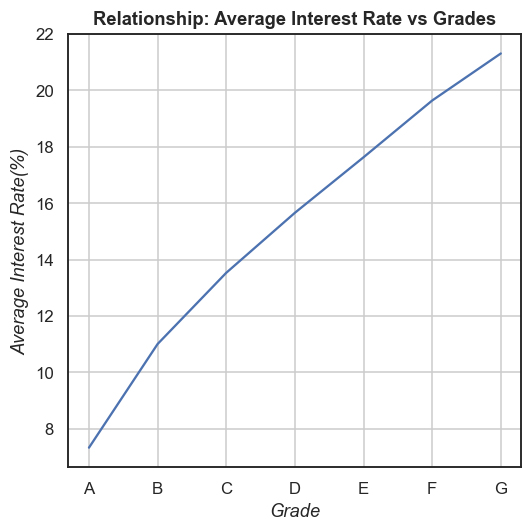

In [180]:
#Average Interest Rate by Grades
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=110)
loan.groupby(['grade']).int_rate.mean().plot.line()
plt.xlabel('Grade', fontsize=12,fontstyle='italic')
plt.ylabel('Average Interest Rate(%)', fontsize=12,fontstyle='italic')
plt.title('Relationship: Average Interest Rate vs Grades', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.grid(True)
plt.show()

As the grade move from A to G the agerage interest rates goes on increasing. Hence there is a higher risk of defaulting 
involved as the grade increases.

# Defaulter Rate(%) as per 'Grade' and Loan Status Analysis

C:\Users\pravin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


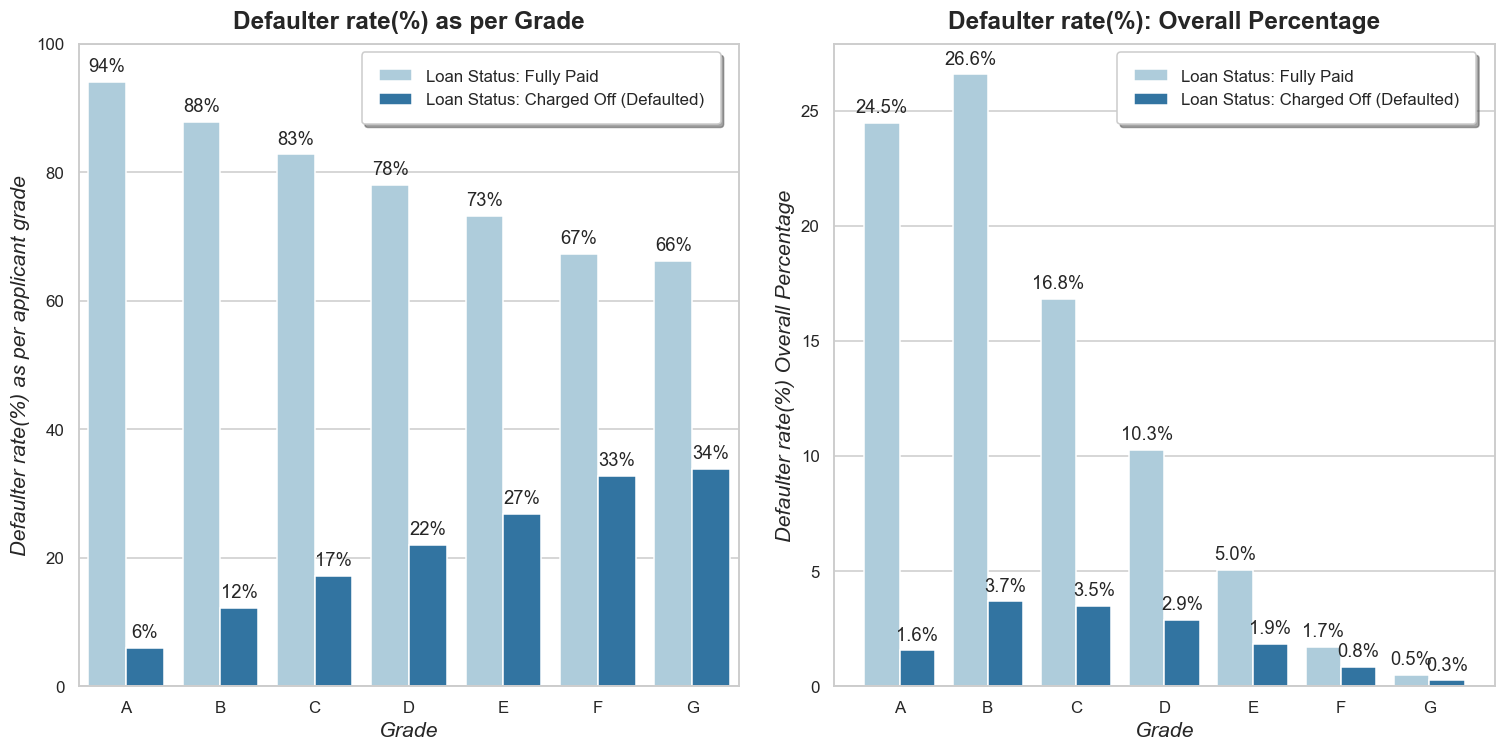

In [181]:
##Defaulter Rate(%) as per 'grade' analysis. Finding the defaulter rate (%) using 'grade' and 'loan_status' variables.
grade_ls = loan.loc[:,['grade','loan_status']]
grade_ls_gpby = grade_ls.groupby(['grade','loan_status']).size().to_frame('c_gls')
grade_ls_gpby.reset_index(inplace=True)
grade_ls_gpby['pct_count_gwise']= ""
grade_ls_gpby['c_gls'] = grade_ls_gpby['c_gls'].astype('int')


A = grade_ls_gpby[grade_ls_gpby.grade=='A']
A.pct_count_gwise = round(100*A['c_gls']/A['c_gls'].sum(),2)
B = grade_ls_gpby[grade_ls_gpby.grade=='B']
B.pct_count_gwise = round(100*B['c_gls']/B['c_gls'].sum(),2)
C = grade_ls_gpby[grade_ls_gpby.grade=='C']
C.pct_count_gwise = round(100*C['c_gls']/C['c_gls'].sum(),2)
D = grade_ls_gpby[grade_ls_gpby.grade=='D']
D.pct_count_gwise = round(100*D['c_gls']/D['c_gls'].sum(),2)
E = grade_ls_gpby[grade_ls_gpby.grade=='E']
E.pct_count_gwise = round(100*E['c_gls']/E['c_gls'].sum(),2)
F = grade_ls_gpby[grade_ls_gpby.grade=='F']
F.pct_count_gwise = round(100*F['c_gls']/F['c_gls'].sum(),2)
G = grade_ls_gpby[grade_ls_gpby.grade=='G']
G.pct_count_gwise = round(100*G['c_gls']/G['c_gls'].sum(),2)

grade_ls_final = pd.concat([A,B,C,D,E,F,G])
#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_gwise, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per applicant grade', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Grade',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Fully Paid')
A.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

#subplot 2 
plt.subplot(122)
grade_ls_final['pct_count_of_total']= round(100*grade_ls_final['c_gls']/grade_ls_final['c_gls'].sum(),2)

ax_T = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_of_total, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_T.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Fully Paid')
T.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_T.patches:
    ax_T.annotate(format(p.get_height(), '.1f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=12, textcoords = 'offset points')

plt.tight_layout()
plt.autoscale()
plt.show()

In [ ]:
from the left graph we see the percentage of defaulters is significantly high within the categories, 'F' and 'G'. 
This shows Grade'A'are more Credible applicants while  Grade 'G'are Least Credible applicants

from right graph largest % of approved loan defaulters belong to Grade 'B'(3.7%) and 'C'(3.5%) category.

# Defaulter Rate(%) by 'Employment Length' and 'Loan Status' Analysis

C:\Users\pravin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


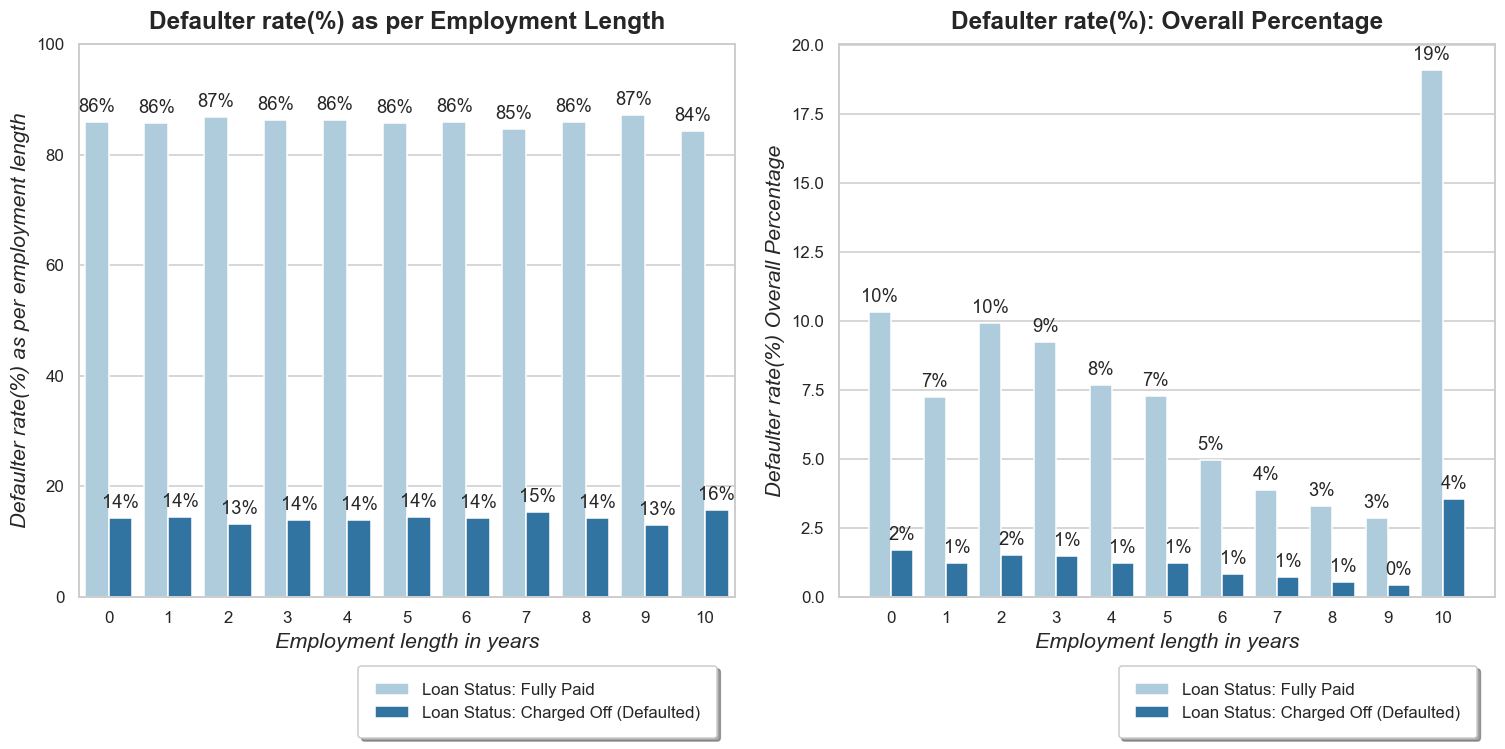

In [182]:
#Employment length and loan status anlaysis. Finding the defaulter rate (%) using 'emp_length' and 'loan_status' variables.
empl_ls = loan.loc[:,['emp_length','loan_status']]
#Retaining only the values known
empl_ls = empl_ls[~(empl_ls.emp_length=='undisclosed')]
empl_ls_gpby = empl_ls.groupby(['emp_length','loan_status']).size().to_frame('c_els')
empl_ls_gpby.reset_index(inplace=True)
empl_ls_gpby['pct_count_lwise']= ""
empl_ls_gpby['c_els'] = empl_ls_gpby['c_els'].astype('int')

E0 = empl_ls_gpby[empl_ls_gpby.emp_length=='0']
E0.pct_count_lwise = round(100*E0['c_els']/E0['c_els'].sum(),2)
E1 = empl_ls_gpby[empl_ls_gpby.emp_length=='1']
E1.pct_count_lwise = round(100*E1['c_els']/E1['c_els'].sum(),2)
E2 = empl_ls_gpby[empl_ls_gpby.emp_length=='2']
E2.pct_count_lwise = round(100*E2['c_els']/E2['c_els'].sum(),2)
E3 = empl_ls_gpby[empl_ls_gpby.emp_length=='3']
E3.pct_count_lwise = round(100*E3['c_els']/E3['c_els'].sum(),2)
E4 = empl_ls_gpby[empl_ls_gpby.emp_length=='4']
E4.pct_count_lwise = round(100*E4['c_els']/E4['c_els'].sum(),2)
E5 = empl_ls_gpby[empl_ls_gpby.emp_length=='5']
E5.pct_count_lwise = round(100*E5['c_els']/E5['c_els'].sum(),2)
E6 = empl_ls_gpby[empl_ls_gpby.emp_length=='6']
E6.pct_count_lwise = round(100*E6['c_els']/E6['c_els'].sum(),2)
E7 = empl_ls_gpby[empl_ls_gpby.emp_length=='7']
E7.pct_count_lwise = round(100*E7['c_els']/E7['c_els'].sum(),2)
E8 = empl_ls_gpby[empl_ls_gpby.emp_length=='8']
E8.pct_count_lwise = round(100*E8['c_els']/E8['c_els'].sum(),2)
E9 = empl_ls_gpby[empl_ls_gpby.emp_length=='9']
E9.pct_count_lwise = round(100*E9['c_els']/E9['c_els'].sum(),2)
E10 = empl_ls_gpby[empl_ls_gpby.emp_length=='10']
E10.pct_count_lwise = round(100*E10['c_els']/E10['c_els'].sum(),2)

empl_ls_final =pd.concat([E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10])
empl_ls_final

#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=empl_ls_final.emp_length, y=empl_ls_final.pct_count_lwise, hue=empl_ls_final.loan_status, palette='Paired')
plt.xlabel('Employment length in years', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per employment length', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Employment Length',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Fully Paid')
A.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#subplot 2 
plt.subplot(122)
empl_ls_final['pct_count_of_total']= round(100*empl_ls_final['c_els']/empl_ls_final['c_els'].sum(),2)

ax_F = sns.barplot(x=empl_ls_final.emp_length, y=empl_ls_final.pct_count_of_total, hue=empl_ls_final.loan_status, palette='Paired')
plt.xlabel('Employment length in years', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
M= ax_F.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
M.get_texts()[0].set_text('Loan Status: Fully Paid')
M.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_F.patches:
    ax_F.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.tight_layout()
plt.autoscale()
plt.show()

In [ ]:
This shows that the employees with 10 year emoployment length are maximum defaulters

# Rate(%): Home Ownership Status (Among Defaulters) Analysis

In [183]:
##Home Ownership Status and Loan Status analysis. Finding the defaulters(%) according to 'home_ownership' variable. (loan status->charged off i.e. '1')
home = loan.loc[:,['home_ownership','loan_status']]
#Considering only the defaulters (charged off='1')
home = home[home.loan_status=='1']
#Check for unique entries in 'home_ownership' column
home.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

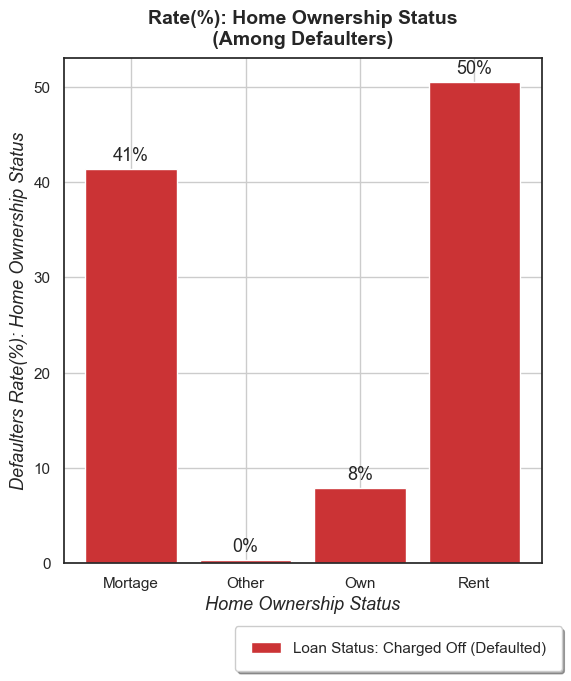

In [186]:
##Retaining the known values only
home_ls_final = home.groupby(['home_ownership','loan_status']).size().to_frame('c_hls')
home_ls_final.reset_index(inplace=True)
home_ls_final['c_hls'] = home_ls_final['c_hls'].astype('int')
home_ls_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7), dpi=100)

home_ls_final['pct_count_of_total']= round(100*home_ls_final['c_hls']/home_ls_final['c_hls'].sum(),2)

ax_K1 = sns.barplot(x=home_ls_final.home_ownership, y=home_ls_final.pct_count_of_total, hue=home_ls_final.loan_status, palette='Set1')
plt.xlabel('Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters Rate(%): Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.title('Rate(%): Home Ownership Status\n (Among Defaulters) ',fontsize= 14, fontweight='bold', pad=10)
plt.ylim(0,100)
#Legend
L1= ax_K1.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L1.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K1.patches:
    ax_K1.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2,3],['Mortage','Other','Own','Rent'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()


# Rate(%) Verification Status (Among Defaulters)

In [ ]:
#Check unique items in 'verification_status' column
loan.verification_status.unique()

In [ ]:
##Finding the defaulters(%) according to 'verification_status' variable. (loan status->charged off i.e. '1')
verf_1 = loan.loc[:,['verification_status','loan_status']]
#Considering only the defaulters (charged off='1')
verf_1 = verf_1[verf_1.loan_status=='1']
#Retaining only the values known
verf_1_final = verf_1.groupby(['verification_status','loan_status']).size().to_frame('c_vls')
verf_1_final.reset_index(inplace=True)
verf_1_final['c_vls'] = verf_1_final['c_vls'].astype('int')
verf_1_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7.5), dpi=100)

verf_1_final['pct_count_of_total']= round(100*verf_1_final['c_vls']/verf_1_final['c_vls'].sum(),2)

ax_K2 = sns.barplot(x=verf_1_final.verification_status, y=verf_1_final.pct_count_of_total, hue=verf_1_final.loan_status, palette='Set1')
plt.xlabel('Applicant Verification Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters(%): Verification Status among defaulters', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Rate(%) Verification Status (Among Defaulters)',fontsize= 14, fontweight='bold', pad=10)
#Legend
L2= ax_K2.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L2.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K2.patches:
    ax_K2.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2],['Not Verified','Source Verified','Verified'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

# Defaulters Rate(%) analysis based on Loan Amount

In [ ]:
##Defaulters Rate(%) analysis on the basis of loan amount. 
loan.loan_amnt.describe()

In [ ]:
##Creating bins for  loan amount per the information above
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
loan_amnt_gby = loan.groupby(['loan_amnt_bin','loan_status']).size().to_frame('c_gls')
loan_amnt_gby.reset_index(inplace=True)
loan_amnt_gby

loan_amnt_gby['c_gls'] = loan_amnt_gby['c_gls'].astype('int')


bin1  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='0-5k']
bin1['pct_count_gwise'] =   round(100*bin1['c_gls']/bin1['c_gls'].sum(),2)

bin2  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='5-10k']
bin2['pct_count_gwise'] =   round(100*bin2['c_gls']/bin2['c_gls'].sum(),2)

bin3  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='10-15k']
bin3['pct_count_gwise'] =   round(100*bin3['c_gls']/bin3['c_gls'].sum(),2)

bin4  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='15-20k']
bin4['pct_count_gwise'] =   round(100*bin4['c_gls']/bin4['c_gls'].sum(),2)

bin5  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='20-25k']
bin5['pct_count_gwise'] =   round(100*bin5['c_gls']/bin5['c_gls'].sum(),2)

bin6  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='25-30k']
bin6['pct_count_gwise'] =   round(100*bin6['c_gls']/bin6['c_gls'].sum(),2)

bin7  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='30-35k']
bin7['pct_count_gwise'] =   round(100*bin7['c_gls']/bin7['c_gls'].sum(),2)

loan_amnt_ls_final = pd.concat([bin1,bin2,bin3,bin4,bin5,bin6,bin7])

sns.set(style='white')
plt.figure(figsize=(7,7), dpi=100)

ax_ln = sns.barplot(x='loan_amnt_bin',y='pct_count_gwise', hue = 'loan_status',data=loan_amnt_ls_final, palette=('Paired'))
plt.xlabel('Loan Amount [Bins: (5K USD each)]', fontsize= 12, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per Loan Amount', fontsize= 12, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter Rate(%) as per Loan Amount: Category-wise',fontsize= 14, fontweight='bold', pad=10)
#Legend
A= ax_ln.legend(loc='upper center', bbox_to_anchor=(0.75,-0.1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')
A.get_texts()[1].set_text('Loan Status: Fully Paid')
#Display values
for p in ax_ln.patches:
    ax_ln.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')    

plt.tight_layout()
plt.autoscale()
plt.show()

# Defaulters Rate(%) analysis based on Annual Income of approved Loan Applicants

In [ ]:
##Annual Income and Defaulters rate(%) analysis
round(loan.annual_inc.describe(),2)

In [ ]:
loan.annual_inc.quantile([.1, .2,.3,.4 ,.5 ,.6 ,.7,.8,.9,.95,.98,1])

In [ ]:
##Lets try and find out if we can find any inference between income and loan staus after binning the income 

def bin_annual_income (n):
    if n <= 45000:
        return 'low'
    elif n > 45000 and n <=90000:
        return 'medium'
    elif n > 90000 and n <=150000:
        return 'high'
    else:
        return 'very high'

    
loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda x: bin_annual_income(x)) 


annual_inc_gby = loan.groupby(['annual_inc_bin','loan_status']).size().to_frame('c_gls')
annual_inc_gby.reset_index(inplace=True)
annual_inc_gby['c_gls'] = annual_inc_gby['c_gls'].astype('int')
annual_inc_gby


binl  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='low']
binl['pct_count_gwise'] =   round(100*binl['c_gls']/binl['c_gls'].sum(),2)

binm  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='medium']
binm['pct_count_gwise'] =   round(100*binm['c_gls']/binm['c_gls'].sum(),2)


binh  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='high']
binh['pct_count_gwise'] =   round(100*binh['c_gls']/binh['c_gls'].sum(),2)



binvh  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='very high']
binvh['pct_count_gwise'] =   round(100*binvh['c_gls']/binvh['c_gls'].sum(),2)


annual_inc_gby_final = pd.concat([binl,binm,binh,binvh])


annual_inc_gby_final['pct_count_of_total']= round(100*annual_inc_gby_final['c_gls']/annual_inc_gby_final['c_gls'].sum(),2)


sns.set(style='white')
plt.figure(figsize=(8,7), dpi=100)

#Plot
ax_ln2 = sns.barplot(x=annual_inc_gby_final.annual_inc_bin, y=annual_inc_gby_final.pct_count_of_total
                     , hue=annual_inc_gby_final.loan_status
                   , palette='Paired')
plt.xlabel('Income Category', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulter rate(%): Overall percentage', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter Rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_ln2.legend(loc='upper center', bbox_to_anchor=(0.75, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Fully Paid')
T.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.xticks([0,1,2,3],['Low (<= 45k)','Medium (45k-90k)','High (90k-150k)','Very High (> 150k)'], fontsize=12)
for p in ax_ln2.patches:
    ax_ln2.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')    

plt.tight_layout()
plt.autoscale()
plt.show()

# Average Interest Rate by Loan Term Analysis (Among Defaulters)

In [ ]:
##Average Interest Rate vs Loan Term analysis
#Considering only defaulters
trm_df = loan[loan.loan_status=='1']
trm_grpby = trm_df.groupby('term')['int_rate'].mean().reset_index()

In [ ]:
sns.set(style='white')
plt.figure(figsize=(6,6.5), dpi=100)
ax_trm = sns.barplot(x='term',y='int_rate', data=trm_grpby, palette=('Reds'))


plt.xlabel('Loan Term(months)', fontsize= 13, fontstyle='italic')
plt.ylabel('Average Interest Rate(%) allocated to defaulter applicants', fontsize= 12, fontstyle='italic')
plt.title("Average Interest Rate by Loan Term\n (Among Defaulters)", fontsize=14,fontweight='bold', pad=10)
plt.xticks(fontsize=13)
for p in ax_trm.patches:
    ax_trm.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                        , p.get_height()), ha = 'center'\
                    , va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')
    
plt.tight_layout()
plt.grid(True)
plt.autoscale()
plt.show()